# Session 3b: Neural Networks in Pytorch

## Setups

In [1]:
# !pip install Pillow numpy matplotlib
# !pip install numpy torchvision_nightly
# !pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
# import torch
# torch.__version__

## Imports

In [2]:
%matplotlib inline

#the usual suspects
import math
import random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

#torch
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim

#use cuda 0 if available; assuming 1 gpu
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## Learning Objectives

1. **Building Blocks** 

Familiarize ourselves with basic building blocks of a neural network in PyTorch such as tensors and layers

2. **Your First Neural Network**

Build your first neural network with the main components of architecture, loss and optimizer

3. **Spiral Example** 

Use your first neural network in a task challenging for linear models to understand why we even need deep learning

# Building Blocks

## Machine Learning in A Nutshell

Obligatory relevant [xkcd](https://xkcd.com/1838/)

<img src="img/xkcd_ml.png" alt="Monte Carlo Casino" width=30%/>

## Tensors

A fancy way of saying n-dimensional vector/matrix.
* Vector: one-dimensional tensor
* Matrix: two-dimensional tensor

### Create

In [3]:
#only zeros
torch.zeros(10)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [4]:
#only ones
torch.ones(2,2)

tensor([[1., 1.],
        [1., 1.]])

In [5]:
#identity
torch.eye(3,3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [6]:
#uniform random
torch.rand(3,2,2)

tensor([[[0.9374, 0.6986],
         [0.8348, 0.7078]],

        [[0.0316, 0.2477],
         [0.2881, 0.3512]],

        [[0.3819, 0.9197],
         [0.1107, 0.3845]]])

In [7]:
#normal random
torch.randn(1,2,3,4)

tensor([[[[-0.9375, -0.6435, -1.6123, -1.4301],
          [-0.4269,  1.2365, -0.6519,  0.3194],
          [-0.3032, -1.4888, -0.6049, -0.7703]],

         [[-0.4593,  0.2939, -1.4311,  0.1594],
          [-0.3214, -0.2852, -1.2396, -0.6835],
          [ 0.6318, -0.1046,  0.4788, -0.4759]]]])

In [8]:
#random integers
torch.randint(low = 0, high = 10, size = (3,3))

tensor([[0, 0, 0],
        [2, 1, 6],
        [9, 3, 3]])

In [9]:
#some numpy favorites
#arange
torch.arange(start = 0, end = 10, step = 1)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
#linspace
torch.linspace(start = 1,end = 10, steps = 10)

tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [11]:
#from list
torch.tensor([[1,2,3],[4,5,6],[7,8,9]], dtype=torch.float64)

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]], dtype=torch.float64)

In [12]:
#from numpy
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
b = torch.from_numpy(a)
b

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [13]:
#to numpy
b.numpy()

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [14]:
#copy dimensions
a = torch.rand(3,3)
b = torch.ones_like(a)
print(f'Original tensor:\n {a}')
print(f'Created tensor:\n {b}')

Original tensor:
 tensor([[0.4003, 0.1509, 0.2011],
        [0.2453, 0.6886, 0.3602],
        [0.6273, 0.9877, 0.9582]])
Created tensor:
 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [15]:
#copy from other tensors
a = torch.zeros(2,2)
b = torch.randn(2,2)

print(f'Original tensor a:\n {a}')
print(f'Original tensor b:\n {b}')
a.copy_(b)
print(f'Copied tenso a:\n {b}')

Original tensor a:
 tensor([[0., 0.],
        [0., 0.]])
Original tensor b:
 tensor([[ 0.1038, -0.0733],
        [-0.6339,  1.3653]])
Copied tenso a:
 tensor([[ 0.1038, -0.0733],
        [-0.6339,  1.3653]])


In [16]:
torch.ones(3,3,3)

tensor([[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]])

### Size and Shaping

In [17]:
#size, shape, device
a = torch.randint(low = 0, high = 10, size = (3,3))
print(a.shape, a.size(), a.dtype, a.device)
a

torch.Size([3, 3]) torch.Size([3, 3]) torch.int64 cpu


tensor([[3, 3, 0],
        [2, 0, 1],
        [7, 4, 6]])

In [18]:
#unsqueeze
b = a.unsqueeze(2).unsqueeze(3)
b.shape

torch.Size([3, 3, 1, 1])

In [19]:
#squeeze
b.squeeze(2).shape

torch.Size([3, 3, 1])

In [20]:
#for view
a.view(1,-1)

tensor([[3, 3, 0, 2, 0, 1, 7, 4, 6]])

In [21]:
#for view (or copy if view not available)
a.reshape(1,-1)

tensor([[3, 3, 0, 2, 0, 1, 7, 4, 6]])

In [22]:
#transpose
print(f'Original tensor:\n{a}')
print(f'Transposed tensor:\n{a.transpose(0,1)}')

Original tensor:
tensor([[3, 3, 0],
        [2, 0, 1],
        [7, 4, 6]])
Transposed tensor:
tensor([[3, 2, 7],
        [3, 0, 4],
        [0, 1, 6]])


In [23]:
#permute dimension
a = torch.zeros(5,4,3)
a.shape, a.permute(2,0,1).shape

(torch.Size([5, 4, 3]), torch.Size([3, 5, 4]))

In [24]:
#concatenate
a = torch.zeros(1,3,5,5)
b = torch.ones(1,3,5,5)
c = torch.randn(1,3,5,5)
torch.cat((a,b,c)).shape

torch.Size([3, 3, 5, 5])

### Data Types

While `torch.tensor` defaults to the closest data type and `torch.Tensor` defaults to 32-bit floating point, these are the data types a tensor can contain.

| Data type                | dtype                         | CPU tensor         | GPU tensor              |
|--------------------------|-------------------------------|--------------------|-------------------------|
| 32-bit floating point    | torch.float32 or torch.float  | torch.FloatTensor  | torch.cuda.FloatTensor  |
| 64-bit floating point    | torch.float64 or torch.double | torch.DoubleTensor | torch.cuda.DoubleTensor |
| 16-bit floating point    | torch.float16 or torch.half   | torch.HalfTensor   | torch.cuda.HalfTensor   |
| 8-bit integer (unsigned) | torch.uint8                   | torch.ByteTensor   | torch.cuda.ByteTensor   |
| 8-bit integer (signed)   | torch.int8                    | torch.CharTensor   | torch.cuda.CharTensor   |
| 16-bit integer (signed)  | torch.int16 or torch.short    | torch.ShortTensor  | torch.cuda.ShortTensor  |
| 32-bit integer (signed)  | torch.int32 or torch.int      | torch.IntTensor    | torch.cuda.IntTensor    |
| 64-bit integer (signed)  | torch.int64 or torch.long     | torch.LongTensor   | torch.cuda.LongTensor   |

In [25]:
#data type
a = torch.randint(low = 0, high = 10, size = (3,3), dtype = torch.float64)
print(a.shape, a.size(), a.dtype, a.device)
a

torch.Size([3, 3]) torch.Size([3, 3]) torch.float64 cpu


tensor([[5., 6., 9.],
        [9., 8., 3.],
        [5., 7., 3.]], dtype=torch.float64)

In [26]:
#conversion
a.float().dtype

torch.float32

### Device

In [27]:
a = torch.randint(low = 0, high = 10, size = (3,3), dtype = torch.float64).to(device)
print(a.shape, a.size(), a.dtype, a.device)
a

torch.Size([3, 3]) torch.Size([3, 3]) torch.float64 cpu


tensor([[6., 9., 6.],
        [8., 5., 6.],
        [2., 9., 4.]], dtype=torch.float64)

In [28]:
#specifying manually
a = torch.randint(low = 0, high = 10, size = (3,3), dtype = torch.float64).to('cpu')
print(a.shape, a.size(), a.dtype, a.device)
a

torch.Size([3, 3]) torch.Size([3, 3]) torch.float64 cpu


tensor([[6., 4., 0.],
        [8., 1., 6.],
        [9., 4., 8.]], dtype=torch.float64)

#### Library to Use GPU

CUDA is a parallel computing platform and programming model invented by NVIDIA. It enables dramatic increases in computing performance by harnessing the power of the graphics processing unit (GPU).

In [29]:
print(f'Is CUDA available? {torch.cuda.is_available()}')

Is CUDA available? False


#### Library to Do Neural Networks on GPU

The NVIDIA CUDA® Deep Neural Network library (cuDNN) is a GPU-accelerated library of primitives for deep neural networks. cuDNN provides highly tuned implementations for standard routines such as forward and backward convolution, pooling, normalization, and activation layers. cuDNN is part of the NVIDIA Deep Learning SDK.

In [30]:
print(f'Is CuDNN enabled? {torch.backends.cudnn.enabled}')

Is CuDNN enabled? True


### Slice

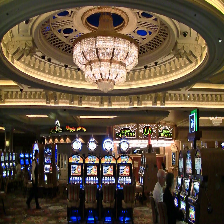

In [32]:
#load image
img = Image.open('img/monte_carlo.jpg')
img = img.resize((224,224))
img

In [33]:
#convert to tensor
img_arr = torch.tensor(np.array(img))
img_arr.shape

torch.Size([224, 224, 3])

torch.Size([112, 112, 3])


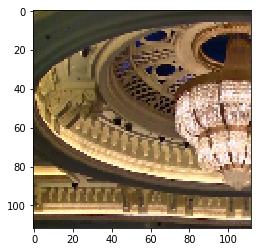

In [36]:
#slice parts of tensor
quarter = img_arr[:112,:112,:]
print(quarter.shape)
plt.imshow(quarter.numpy())

torch.Size([224, 224])
torch.Size([224, 224])
torch.Size([224, 224])


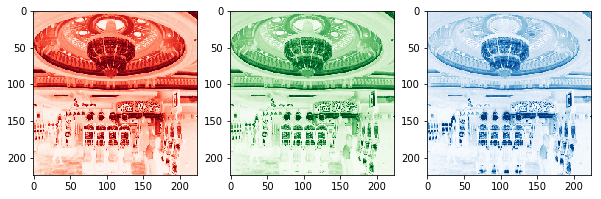

In [37]:
#display separate channels
cols = ['Reds','Greens','Blues']
fig=plt.figure(figsize=(10, 5))
for i in range(3):
    one_channel = img_arr[:,:,i]
    print(one_channel.shape)
    fig.add_subplot(1, 3, i+1)
    plt.imshow(one_channel.numpy(),cmap=cols[i])

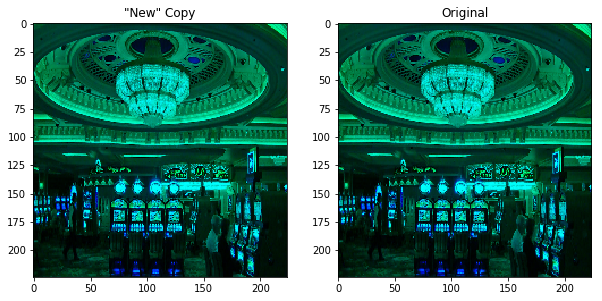

In [38]:
#shallow copy
fake_new = img_arr
fake_new[:,:,0] = 0

fig=plt.figure(figsize=(10, 5))
fig.add_subplot(1, 2, 1)
#fake new copy
plt.title('"New" Copy')
plt.imshow(fake_new.numpy())
fig.add_subplot(1, 2, 2)
plt.title('Original')
#original
plt.imshow(img_arr.numpy())

In [39]:
img = Image.open('img/monte_carlo.jpg')
img = img.resize((224,224))
img_arr = torch.tensor(np.array(img))

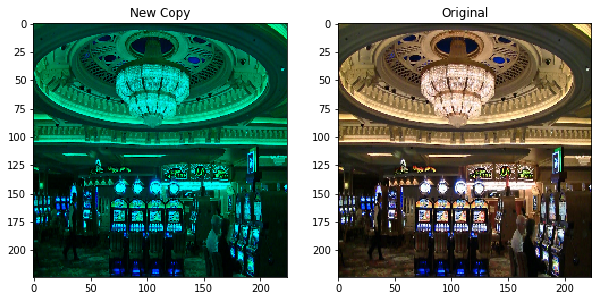

In [40]:
#deep copy
real_new = img_arr.clone()
real_new[:,:,0] = 0

fig=plt.figure(figsize=(10, 5))
fig.add_subplot(1, 2, 1)
#fake new copy
plt.title('New Copy')
plt.imshow(real_new.numpy())
fig.add_subplot(1, 2, 2)
plt.title('Original')
#original
plt.imshow(img_arr.numpy())

In [43]:
#gather
a = torch.randint(low = 0, high = 10, size = (3,3), dtype = torch.float64).to(device)
b = torch.tensor([[0],[1],[2]])
print(a)
a.gather(dim=1,index=b)

tensor([[6., 8., 9.],
        [5., 8., 5.],
        [2., 6., 6.]], dtype=torch.float64)


tensor([[6.],
        [8.],
        [6.]], dtype=torch.float64)

### Map Operations

In [48]:
a = torch.randint(low = 0, high = 10, size = (3,3), dtype = torch.float64).to(device)
a

tensor([[6., 8., 6.],
        [4., 1., 1.],
        [5., 2., 6.]], dtype=torch.float64)

In [51]:
#"out" place
print(a.div(10))
print(a)

tensor([[0.6000, 0.8000, 0.6000],
        [0.4000, 0.1000, 0.1000],
        [0.5000, 0.2000, 0.6000]], dtype=torch.float64)
tensor([[6., 8., 6.],
        [4., 1., 1.],
        [5., 2., 6.]], dtype=torch.float64)


In [52]:
#in place
print(a.div_(10))
print(a)
a.mul_(10)

tensor([[0.6000, 0.8000, 0.6000],
        [0.4000, 0.1000, 0.1000],
        [0.5000, 0.2000, 0.6000]], dtype=torch.float64)
tensor([[0.6000, 0.8000, 0.6000],
        [0.4000, 0.1000, 0.1000],
        [0.5000, 0.2000, 0.6000]], dtype=torch.float64)


tensor([[6., 8., 6.],
        [4., 1., 1.],
        [5., 2., 6.]], dtype=torch.float64)

In [39]:
#exp and log
a.exp().log()

tensor([[2., 5., 2.],
        [9., 3., 9.],
        [3., 6., 4.]], dtype=torch.float64)

In [40]:
#power and roots
a.pow(2).sqrt()

tensor([[2., 5., 2.],
        [9., 3., 9.],
        [3., 6., 4.]], dtype=torch.float64)

In [53]:
#set lower/upper bounds
torch.clamp(a, min=5, max=None)

tensor([[6., 8., 6.],
        [5., 5., 5.],
        [5., 5., 6.]], dtype=torch.float64)

In [42]:
#fill with constant
a.fill_(0.5)

tensor([[0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000]], dtype=torch.float64)

In [54]:
#custom function
def power2(x):
    return(x**2)

a.apply_(power2)

tensor([[36., 64., 36.],
        [16.,  1.,  1.],
        [25.,  4., 36.]], dtype=torch.float64)

### Reduce Operations

In [55]:
a = torch.randint(low = 0, high = 10, size = (3,3), dtype = torch.float64).to(device)
a

tensor([[7., 2., 0.],
        [8., 7., 7.],
        [8., 7., 3.]], dtype=torch.float64)

In [56]:
#sum
a.sum(dim=0), a.sum(dim=1)

(tensor([23., 16., 10.], dtype=torch.float64),
 tensor([ 9., 22., 18.], dtype=torch.float64))

In [62]:
#mean
a.mean()

tensor(5.4444, dtype=torch.float64)

In [63]:
#max / min
a.max(dim=0),a.argmax(dim=0), a.min(dim=1), a.argmin(dim=1)

((tensor([8., 7., 7.], dtype=torch.float64), tensor([2, 2, 1])),
 tensor([2, 2, 1]),
 (tensor([0., 7., 3.], dtype=torch.float64), tensor([2, 2, 2])),
 tensor([2, 2, 2]))

### Tensor-to-Tensor Operations

In [64]:
a = torch.tensor([[1,2,3],[4,5,6],[7,8,9]], dtype=torch.float64)
b = torch.eye(3,3, dtype = torch.float64)
c = torch.tensor([[1],[0],[1]], dtype = torch.float64)
print(a)
print(b)
print(c)

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]], dtype=torch.float64)
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]], dtype=torch.float64)
tensor([[1.],
        [0.],
        [1.]], dtype=torch.float64)


In [65]:
#add/subtract
a+b

tensor([[ 2.,  2.,  3.],
        [ 4.,  6.,  6.],
        [ 7.,  8., 10.]], dtype=torch.float64)

In [50]:
#element-wise multiply/divide
a*b

tensor([[1., 0., 0.],
        [0., 5., 0.],
        [0., 0., 9.]], dtype=torch.float64)

If you do not know what dot product is, see [this visualization](http://matrixmultiplication.xyz/).

In [66]:
#dot product
a@c

tensor([[ 4.],
        [10.],
        [16.]], dtype=torch.float64)

### Broadcasting

In [67]:
a = torch.tensor([[1,2,3],[4,5,6],[7,8,9]], dtype=torch.float64)
b = torch.tensor([10], dtype=torch.float64)
c = torch.tensor([[1],[0],[1]], dtype = torch.float64)
print(a)
print(b)
print(c)

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]], dtype=torch.float64)
tensor([10.], dtype=torch.float64)
tensor([[1.],
        [0.],
        [1.]], dtype=torch.float64)


In [68]:
a+c

tensor([[ 2.,  3.,  4.],
        [ 4.,  5.,  6.],
        [ 8.,  9., 10.]], dtype=torch.float64)

In [54]:
a+c.reshape(1,-1)

tensor([[ 2.,  2.,  4.],
        [ 5.,  5.,  7.],
        [ 8.,  8., 10.]], dtype=torch.float64)

In [55]:
a+b

tensor([[11., 12., 13.],
        [14., 15., 16.],
        [17., 18., 19.]], dtype=torch.float64)

**Coding Assignment** Some examples stolen from [100 numpy exercises](https://www.labri.fr/perso/nrougier/teaching/numpy.100/). Complete the 100 if you feel you are not familiar with tensors yet.

1. Create a 1x2x3 random tensor with values from standard normal distribution $N(0,1)$
2. Create a tensor with values ranging from 10 to 49
3. Create a 3x3 tensor with values ranging from 0 to 8
4. Create a 5x5 tensor with 1 on the border and 0 inside
5. Create a 8x8 matrix and fill it with a checkerboard pattern (0 being white and 1 being black)
6. Multipy a 5x5 random tensor with 5x5x3 random tensor
7. Subtract the mean of each column from a 10x5 random tensor
8. Calculate mean squared errors between two 2x4x8 random tensors
9. Apply the following function to a 2x2 identity tensor: $f(x) = \frac{1}{1+e^{-x}}$
10. Concatenate `torch.tensor([1,2,3])`, `torch.tensor([4,5,6])`, `torch.tensor([7,8,9])` to be a 3x3 tensor

In [79]:
'''
Write your codes here
'''

tensor(1.9547)

## Layers

Commonly used sets of tensor operations

### Input

In [86]:
batch_size = 5
input_size = 7
output_size = 3
x = torch.randn(batch_size, input_size)
x

tensor([[-0.4490,  1.3991, -0.6848,  1.7950, -1.5674, -1.8266, -0.0786],
        [ 0.3314,  1.0752, -0.3558,  1.4360, -0.1408,  1.5750, -0.5717],
        [-1.7357, -1.4948,  1.0410, -0.7824,  0.4209,  0.7236,  0.5880],
        [-0.2279,  0.9602, -0.9228, -0.3964, -0.6247,  0.4561, -2.0374],
        [-0.1694, -1.0435, -1.1174, -0.2827,  0.2089, -0.6488,  1.3020]])

### Linear

A linear layer performs the following operation:

$$y = xW^T + b$$

where:
* `y` is the output (`batch_size` * `output_size`)
* `x` is the input (`batch size` * `input_size`)
* `W` is the weight for linear transformation (`output_size` * `input_size`)
* `b` is the bias for linear transformation (`output_size`)

In [87]:
#pytorch magic
m = nn.Linear(input_size,output_size,bias=True)
output = m(x) #5x7
print(output.shape)
output

torch.Size([5, 3])


tensor([[ 1.2600,  0.1984,  0.8451],
        [ 0.3415, -0.1593, -0.0762],
        [-0.2605,  0.7142, -0.3327],
        [ 0.5940, -0.0402, -0.1481],
        [ 0.4642, -0.1575,  0.4249]], grad_fn=<ThAddmmBackward>)

**Coding Assignment** Implement a linear layer using only tensor operations and not the `torch.nn` modules using the given weight and bias.

In [95]:
#behind the scene
W = m.weight
b = m.bias


### Activation

Unlike the linear layer, activation layers perfrom some mapping operations on your input.Notice that since they do not usually have a set of tensors as weights so we do not need to keep track of them. In this case, we can just simply call a generic version from `torch` (used to be from `torch.nn.functional` from earlier versions). But they still have equivalent in `torch.nn`.

#### Rectified Linear Unit (ReLU)

$$f(x) = max(0,x)$$

In [96]:
#pytorch magic
torch.relu(x)

tensor([[0.0000, 1.3991, 0.0000, 1.7950, 0.0000, 0.0000, 0.0000],
        [0.3314, 1.0752, 0.0000, 1.4360, 0.0000, 1.5750, 0.0000],
        [0.0000, 0.0000, 1.0410, 0.0000, 0.4209, 0.7236, 0.5880],
        [0.0000, 0.9602, 0.0000, 0.0000, 0.0000, 0.4561, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.2089, 0.0000, 1.3020]])

In [97]:
#torch.nn
m = nn.ReLU()
m(x)

tensor([[0.0000, 1.3991, 0.0000, 1.7950, 0.0000, 0.0000, 0.0000],
        [0.3314, 1.0752, 0.0000, 1.4360, 0.0000, 1.5750, 0.0000],
        [0.0000, 0.0000, 1.0410, 0.0000, 0.4209, 0.7236, 0.5880],
        [0.0000, 0.9602, 0.0000, 0.0000, 0.0000, 0.4561, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.2089, 0.0000, 1.3020]])

**Coding Assignment** Implement behind-the-scene ReLU.

In [99]:
'''
Write your code here
'''

#behind the scene


tensor([[0.0000, 1.3991, 0.0000, 1.7950, 0.0000, 0.0000, 0.0000],
        [0.3314, 1.0752, 0.0000, 1.4360, 0.0000, 1.5750, 0.0000],
        [0.0000, 0.0000, 1.0410, 0.0000, 0.4209, 0.7236, 0.5880],
        [0.0000, 0.9602, 0.0000, 0.0000, 0.0000, 0.4561, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.2089, 0.0000, 1.3020]])

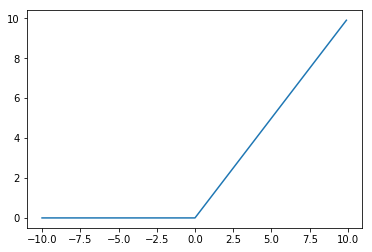

In [100]:
#visualization
inp = torch.arange(-10, 10, 0.1)
outp = torch.relu(inp)
plt.plot(inp.numpy(),outp.numpy())

#### Tanh

$$f(x) = tanh(x)$$

In [63]:
#pytorch magic
torch.tanh(x)

tensor([[-0.2221, -0.2715, -0.8131, -0.2565,  0.1818,  0.1007,  0.8367],
        [-0.0670, -0.7596,  0.4267, -0.2743,  0.4143, -0.8908,  0.4897],
        [-0.4903,  0.5772,  0.2990, -0.9509,  0.8105,  0.6824,  0.6551],
        [ 0.4333, -0.5009,  0.1274,  0.5866, -0.9634,  0.0995,  0.1902],
        [ 0.7847,  0.1014,  0.9612,  0.5158, -0.8497,  0.6187,  0.5394]],
       grad_fn=<TanhBackward>)

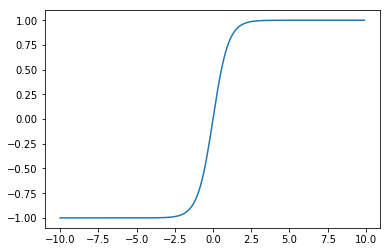

In [64]:
#visualization
#visualization
inp = torch.arange(-10, 10, 0.1)
outp = torch.tanh(inp)
plt.plot(inp.numpy(),outp.numpy())

#### Sigmoid

$$f(x) = \frac{1}{1 + e^{-x}}$$

In [469]:
#pytorch magic
torch.sigmoid(x)

tensor([[0.5746, 0.6477, 0.1068, 0.1380, 0.2863, 0.1862, 0.2429],
        [0.6275, 0.5518, 0.2619, 0.7285, 0.8527, 0.8031, 0.2258],
        [0.2953, 0.0537, 0.2411, 0.6733, 0.5711, 0.3038, 0.6270],
        [0.5069, 0.1622, 0.4021, 0.9125, 0.3718, 0.8197, 0.5432],
        [0.6186, 0.0936, 0.4371, 0.4787, 0.5183, 0.8737, 0.4302]])

In [470]:
#behind the scene
def sigmoid_handmade(x):
    result = 1/(1+torch.exp(-x))
    return(result)

sigmoid_handmade(x)

tensor([[0.5746, 0.6477, 0.1068, 0.1380, 0.2863, 0.1862, 0.2429],
        [0.6275, 0.5518, 0.2619, 0.7285, 0.8527, 0.8031, 0.2258],
        [0.2953, 0.0537, 0.2411, 0.6733, 0.5711, 0.3038, 0.6270],
        [0.5069, 0.1622, 0.4021, 0.9125, 0.3718, 0.8197, 0.5432],
        [0.6186, 0.0936, 0.4371, 0.4787, 0.5183, 0.8737, 0.4302]])

**Coding Assigment** Plot how a sigmoid function looks like when x is between -1 and 1

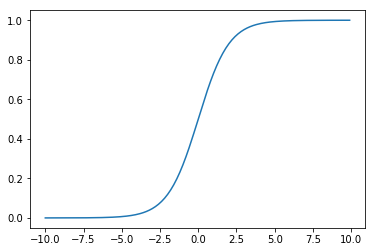

In [101]:
#visualizaton
'''
Write your code here
'''


#### Softmax

$$f(x_i) = \frac{e^{x_i}}{\sum_j e^{x_j}}$$

where $i$ is the current class and $j$ is any class.

In [102]:
#pytorch magic
print(x.shape) #batch_size x output_size
torch.softmax(x, dim = 1) #dim is class/feature dimension

torch.Size([5, 7])


tensor([[0.0510, 0.3239, 0.0403, 0.4813, 0.0167, 0.0129, 0.0739],
        [0.0899, 0.1892, 0.0452, 0.2714, 0.0561, 0.3118, 0.0364],
        [0.0194, 0.0247, 0.3121, 0.0504, 0.1679, 0.2272, 0.1984],
        [0.1184, 0.3886, 0.0591, 0.1001, 0.0796, 0.2347, 0.0194],
        [0.1095, 0.0457, 0.0424, 0.0978, 0.1599, 0.0678, 0.4769]])

In [104]:
#softmax scores of all class for a sample must sum to 1
torch.softmax(x, dim = 1)

tensor([[0.0510, 0.3239, 0.0403, 0.4813, 0.0167, 0.0129, 0.0739],
        [0.0899, 0.1892, 0.0452, 0.2714, 0.0561, 0.3118, 0.0364],
        [0.0194, 0.0247, 0.3121, 0.0504, 0.1679, 0.2272, 0.1984],
        [0.1184, 0.3886, 0.0591, 0.1001, 0.0796, 0.2347, 0.0194],
        [0.1095, 0.0457, 0.0424, 0.0978, 0.1599, 0.0678, 0.4769]])

**Coding Assigment** Implement behind-the-scene softmax.

In [474]:
#behind the scene
'''
Write your code here
'''

def softmax_handmade(x, dim = 1):
    pass

softmax_handmade(x)

tensor([[0.3056, 0.4160, 0.0271, 0.0362, 0.0908, 0.0518, 0.0726],
        [0.1046, 0.0764, 0.0220, 0.1665, 0.3592, 0.2532, 0.0181],
        [0.0665, 0.0090, 0.0504, 0.3270, 0.2112, 0.0692, 0.2666],
        [0.0551, 0.0104, 0.0361, 0.5592, 0.0317, 0.2438, 0.0638],
        [0.1333, 0.0085, 0.0638, 0.0755, 0.0884, 0.5685, 0.0620]])

# Your First Neural Network

A typical neural networks has three components: an **architecture**, a **loss**, and an **optimizer**. 

An **architecture** is a collection of layers that are usually initiated with random weights. When a batch of input tensors is fed into the architecture, it is called **feedforward**. The output is another batch of predicted tensors.

We compare the predicted tensors with ground truth and describe the discrepancy by an arbitrary **loss function**.

The **optimizer** then calculates the derivatives of the loss function called **gradients** in order to update the weights of the architecture to minimize the loss (discrepancies between prediction and ground truth). The loss is thus **backpropagated** from the loss function, through the output layer, all the way up to the input layer using [Chain Rule](https://en.wikipedia.org/wiki/Chain_rule).

As time goes on, the loss will become smaller and our neural network architecture will make a prediction that better reflects our dataset.

<img src="img/neural_nets.png" alt="Components of neural networks" width=40%/>

[From zero to research — An introduction to Meta-learning](https://medium.com/huggingface/from-zero-to-research-an-introduction-to-meta-learning-8e16e677f78a)

In [105]:
batch_size = 5
input_size = 7
output_size = 3
x = torch.randn(batch_size, input_size)
x

tensor([[-0.7261,  1.1580, -1.2760,  0.0832,  1.6526, -0.1307,  1.5492],
        [ 1.9987, -0.1881, -0.7849, -0.5282,  1.1681,  0.9472, -0.0174],
        [ 0.9707,  1.4155, -0.1185,  0.9196, -0.8783, -1.1911, -1.6173],
        [-0.5770, -2.4575,  0.0568, -1.4398,  0.1480, -0.0678, -0.1579],
        [ 2.6213, -1.5610, -1.2072, -0.6251,  0.7347,  1.5050,  0.7567]])

## Architecture and Feedforward

### Quick and Dirty

In [113]:
torch.manual_seed(1412)
m = nn.Sequential(
    nn.Linear(7,3),
    nn.Sigmoid()
)

In [114]:
m(x)

tensor([[0.3880, 0.4300, 0.4484],
        [0.3685, 0.6117, 0.3326],
        [0.3695, 0.6681, 0.5009],
        [0.7624, 0.1817, 0.3435],
        [0.4065, 0.5297, 0.3078]], grad_fn=<SigmoidBackward>)

### Less Quick but More Flexible

In [139]:
torch.manual_seed(1412)
class SimpleNet(nn.Module):
    def __init__(self, input_size, output_size):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(input_size,output_size)
    def forward(self,x):
        return(torch.sigmoid(self.fc1(x)))

In [140]:
m = SimpleNet(7,3)
m(x)

tensor([[0.5601, 0.2786, 0.4506],
        [0.4019, 0.6877, 0.7417],
        [0.4890, 0.4672, 0.6824],
        [0.4067, 0.6244, 0.3567],
        [0.6027, 0.2838, 0.3874]], grad_fn=<SigmoidBackward>)

**Coding Assignment** Create your own architecture using the layers we learned about or some others you found in the [Pytorch documentation](https://pytorch.org/docs/master/). Go crazy.

In [117]:
'''
Write your code here
'''


## Loss

A loss function is a fuction that takes in your model output and compares it with ground truth. It describes the discrepancies between your predictions and ground truth, either in terms of labels (classification), numbers (regression), similarities (clustering).

### Mean-squared Error Loss (MSE/L2 Loss)

$$L(,y_{predicted},y_{true}) = \frac{\sum{(y_{true} - y_{predicted})^2}}{N}$$

where $N$ is the number of samples

In [141]:
batch_size = 5
input_size = 7
output_size = 3
x = torch.randn(batch_size, input_size, requires_grad=True)
y_true = torch.randn(batch_size, output_size, requires_grad=True)

In [142]:
y_true[:,0], m(x)[:,0]

(tensor([ 0.0456,  0.5407, -0.2056,  0.2274, -0.0647], grad_fn=<SelectBackward>),
 tensor([0.5725, 0.4971, 0.3304, 0.3124, 0.2957], grad_fn=<SelectBackward>))

In [143]:
#pytorch magic
loss_func = nn.MSELoss()
loss_func(m(x)[:,0],y_true[:,0])

tensor(0.1408, grad_fn=<MeanBackward1>)

In [79]:
#no reduction; changed from reduce of earlier versions
loss_func = nn.MSELoss(reduction='none') #none, elementwise_mean, sum
print(loss_func(y_true[:,0],m(x)[:,0]))
print(torch.mean(loss_func(m(x)[:,0],y_true[:,0])))

tensor([0.2776, 0.0019, 0.2873, 0.0072, 0.1299], grad_fn=<PowBackward0>)
tensor(0.1408, grad_fn=<MeanBackward1>)


In [144]:
#behind the scene
def MSELoss_handmade(y_pred,y_true):
    result = (y_true-y_pred).pow(2).sum() / y_true.shape[0]
    return(result)

MSELoss_handmade(m(x)[:,0],y_true[:,0])

tensor(0.1408, grad_fn=<DivBackward0>)

### Mean-absolute Error Loss (MAE/L1 Loss)

$$L(y_{predicted},y_{true}) = \frac{\sum{|y_{true} - y_{predicted}|}}{N}$$

where $N$ is the number of samples

In [81]:
#pytorch magic
loss_func = nn.L1Loss()
loss_func(m(x)[:,0],y_true[:,0])

tensor(0.3104, grad_fn=<MeanBackward1>)

**Coding Assigment** Implement behind-the-scene MAE loss.

In [82]:
#behind the scene
'''
Write your code here
'''

'\nWrite your code here\n'

**Concept Assignment** In which cases would MSE loss be better than MAE loss and vice versa? Why?

### Negative Log Likelihood Loss (NLL Loss)

What we expect it to do:
$$L(y_{predicted},y_{label}) = -\frac{\sum_i{log(p_i)}}{N}$$
where $p_i$ is the output score of the correct class.

What Pytorch actually does:
$$L(y_{predicted},y_{label}) = -\frac{\sum_i{p_i}}{N}$$
where $p_i$ is the output score of the correct class. So it is more like **negative likelihood loss** in Pytorch.

In [83]:
batch_size = 5
input_size = 7
output_size = 3
#input
x = torch.randn(batch_size, input_size, requires_grad=True)
print(f'Input tensor: {x}')

#fill targets; multi-class problem
y_label = torch.zeros(batch_size)
for i in range(y_label.shape[0]):
    y_label[i] = random.randint(0,2)
y_label = y_label.long()
print(f'True labels: {y_label}')

#model
torch.manual_seed(1412)
m = nn.Sequential(
    nn.Linear(7,3),
    nn.Sigmoid(),
)
print(f'Model: {m}')

Input tensor: tensor([[-1.8397, -0.0534,  0.1263, -0.4473,  1.7553,  1.0541, -0.9352],
        [ 0.0502,  1.0681, -1.0518,  0.0466, -1.9661, -0.4785, -1.3892],
        [-1.0720,  1.0031,  0.0934,  0.1619, -0.0140, -0.3194, -0.9997],
        [ 1.0782,  1.5341,  0.9806,  0.2142,  1.1993, -0.3049, -0.1399],
        [ 0.0700,  0.2009,  0.3623, -0.0245, -0.5573,  2.4174,  1.7334]],
       requires_grad=True)
True labels: tensor([1, 0, 1, 0, 0])
Model: Sequential(
  (0): Linear(in_features=7, out_features=3, bias=True)
  (1): Sigmoid()
)


In [84]:
#pytorch magic
# F.nll_loss(m(x),y_label)
loss_func = nn.NLLLoss()
loss_func(m(x).log(),y_label)

tensor(0.8434, grad_fn=<NllLossBackward>)

In [85]:
#behind the scene
def nll_loss_handmade(y_pred,y_label):
    gathered = y_pred.gather(dim=1,index=y_label[:,None])
    nl_gathered = - gathered
    return(nl_gathered.mean())
nll_loss_handmade(m(x).log(),y_label)

tensor(0.8434, grad_fn=<MeanBackward1>)

### Cross-entropy Loss

$$L(y_{predicted},y_{label}) = -\frac{\sum_i{log(softmax(p_i))}}{N}$$

where $p_i$ is the output score of the correct class.

In [86]:
batch_size = 5
input_size = 7
output_size = 3
#input
x = torch.randn(batch_size, input_size, requires_grad=True)
print(f'Input tensor: {x}')

#fill targets; multi-class problem
y_label = torch.zeros(batch_size)
for i in range(y_label.shape[0]):
    y_label[i] = random.randint(0,2)
y_label = y_label.long()
print(f'True labels: {y_label}')

#model
torch.manual_seed(1412)
m = nn.Sequential(
    nn.Linear(7,3)
)
print(f'Model: {m}')

Input tensor: tensor([[-0.2599, -1.2997,  0.2103, -0.0626, -0.7611,  1.3667, -0.5361],
        [ 0.4100, -0.2053,  0.2717, -0.5735,  1.0761,  0.1880, -0.4612],
        [ 0.8137,  0.6570,  0.7406,  0.8939,  0.5425, -0.2218,  0.8958],
        [-1.5949,  1.8294, -0.8369,  1.0746,  0.5658,  0.9057,  2.4091],
        [-1.0050,  2.1924, -0.1671,  0.8865,  0.0304,  1.5467,  0.3856]],
       requires_grad=True)
True labels: tensor([0, 0, 2, 1, 2])
Model: Sequential(
  (0): Linear(in_features=7, out_features=3, bias=True)
)


In [87]:
#pytorch magic
# F.cross_entropy(m(x),y_label)
loss_func = nn.CrossEntropyLoss()
loss_func(m(x), y_label)

tensor(1.0456, grad_fn=<NllLossBackward>)

**Coding Assigment** Implement behind-the-scene cross-entropy loss.

In [88]:
#behind the scene
'''
Write your code here
'''


'\nWrite your code here\n'

**Concept Assignment** What is the difference between NLL loss and cross-entropy loss?

## Backpropagation

Neural networks rely on a process called **backpropagation** in order to adjust their weights from random ones to ones that minimize the loss. 

In order to understand how it works, let us look at a simple example architecture:

$$ y_{predicted} = xW $$

where 

* $y_{pred}$ is the tensor of predicted number with dimensions `batch_size` x 1
* $x$ is the input tensor with dimensions `batch_size` x 1; in our case, we make them random numbers between 0 and 1
* $W$ is the randomly initialized weights with dimensions 1 x 1

This example is adapted from [fastai part1v3](https://github.com/fastai/course-v3/blob/master/nbs/dl1/lesson2-sgd.ipynb).

In [165]:
#input x is some random numbers between 0 and 1
batch_size = 100
x = torch.rand(batch_size,1,requires_grad=True) 
x[:5]

tensor([[0.1648],
        [0.6773],
        [0.0271],
        [0.9866],
        [0.0146]], grad_fn=<SliceBackward>)

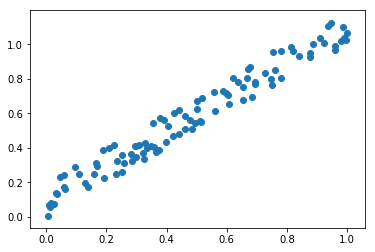

In [166]:
#create our own y_true as identity relationship to x with some random noise
y_true = x + torch.rand(batch_size,1).div_(5)
y_true = y_true.detach()
plt.scatter(x.detach().numpy(),y_true.numpy())

In [171]:
#weight
W = torch.randn(1,1,requires_grad=True)
# W = torch.tensor([[-2.]], requires_grad=True)
print(f'Randomly initialized weight tensor: {W}')

Randomly initialized weight tensor: tensor([[-1.1963]], requires_grad=True)


torch.Size([100, 1])


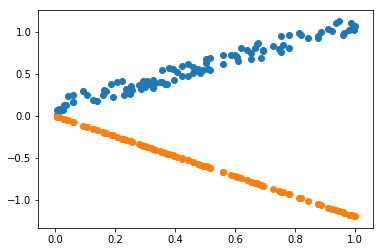

In [172]:
#prediction
y_pred = x@W #this is our model
print(y_pred.shape)
plt.scatter(x.detach().numpy(),y_true.detach().numpy())
plt.scatter(x.detach().numpy(),y_pred.detach().numpy())

We then calculate the loss between our predictions and true numbers.

In [180]:
#mse loss
loss = (y_pred-y_true).pow(2).mean()
# loss = nn.MSELoss(y_pred,y_true)

We want to optimize for a reasonably small loss by adjusting the weights accordingly so we try to **find how much the loss would change, given a very small change in weights**, denoted as:

$$\frac{dL}{dW} = \sum_i\frac{dL_i}{dW}/N $$ 

$$ \frac{dL_i}{dW} = \frac{dL_i}{dy_{pred}} * \frac{dy_{pred}}{dW} $$

$$\frac{dL_i}{dy_{pred}} = \frac{d{(y_{pred}-y_{true})^2}}{dy_{pred}} = 2 * (y_{pred}-y_{true})$$

$$\frac{dy_{pred}}{dW} = \frac{d(xW)}{dW} = X$$

where $L_i$ is the loss for each example.

These derivatives are called **gradients**. And the backward propagation of error derivatives to the weights earlier in the network is aptly named **backpropagation**.

In [174]:
#calculate gradients
dL_dpred = 2 * (y_pred - y_true)
dpred_dW = x
dL_dW = (dL_dpred * dpred_dW).mean().view(1,1)
dL_dpred.shape, dpred_dW.shape, dL_dW.shape

(torch.Size([100, 1]), torch.Size([100, 1]), torch.Size([1, 1]))

We can check whether our calculations are correct by cross-checking with Pytorch **Autograd** functionality. As the name suggests, Pytorch will automatically calculate the gradients in respect to your loss for each tensor that you use the argument `requires_grad=True` when initiating a tensor. You simply need to run the method `backward()` from the loss.

In [175]:
dL_dW

tensor([[-1.4569]], grad_fn=<ViewBackward>)

In [ ]:
#pytorch magic
loss.backward()

In [177]:
W.grad

tensor([[-1.4569]])

The process of finding the set of weights $W$ that fits best with our data by continually substracting a $\frac{dL}{dW}$ from $W$ is called **gradient descent** if we calculate the gradients and perform the update after we went through all training examples and **stochastic gradient descent** if we do it for every example.

$$W \leftarrow W - lr * \frac{dL}{dW}$$

where $lr$ is the **learning rate** indicating how fast we would like to update the weights.

In [178]:
lr = 1
print(f'W before: {W}')
W = W - lr * dL_dW
print(f'W after: {W}')

W before: tensor([[-1.1963]], requires_grad=True)
W after: tensor([[0.2606]], grad_fn=<SubBackward0>)


torch.Size([100, 1])


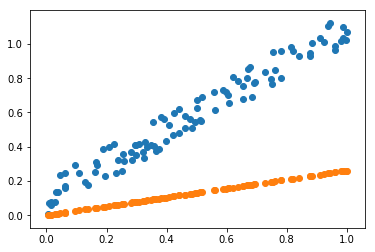

In [179]:
#prediction
y_pred = x@W #this is our model
print(y_pred.shape)
plt.scatter(x.detach().numpy(),y_true.detach().numpy())
plt.scatter(x.detach().numpy(),y_pred.detach().numpy())

## Optimizer

(Stochastic) gradient descent is by no means the only function to update weights. There are a variety of **optimizers** you can choose from, most of them performing better than vanilla gradient descent.


<img src="img/optimizers.gif" alt="Optimizers" width=40%/>

[StackOverflow](https://stats.stackexchange.com/questions/300839/what-causes-a-sudden-drop-in-test-error-when-training-cnn)

Luckily, Pytorch has implemented several popular optimizers for you to use together with autograd using the following scheme:

In [182]:
#input x is some random numbers between 0 and 1
batch_size = 100
x = torch.rand(batch_size,1,requires_grad=True) 
x.shape

torch.Size([100, 1])

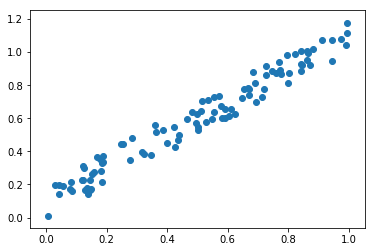

In [183]:
#create our own y_true as identity relationship to x with some random noise
y_true = x + torch.rand(batch_size,1).div_(5)
y_true = y_true.detach()
plt.scatter(x.detach().numpy(),y_true.numpy())

In [186]:
m = nn.Sequential(nn.Linear(1,1,bias=False))
#make the weight bad on purpose
m[0].weight = nn.Parameter(torch.tensor([[-2.]], requires_grad=True))
loss_func = nn.MSELoss()
optimizer = optim.SGD(m.parameters(), lr = 0.1)

def train():
    #feedforward
    y_pred = m(x)
    
    #calculate loss
    loss = loss_func(m(x),y_true)
    
    #reset gradients to zero
    optimizer.zero_grad()
    
    #backpropagate
    loss.backward()
    
    #update weights
    optimizer.step()

torch.Size([100, 1])


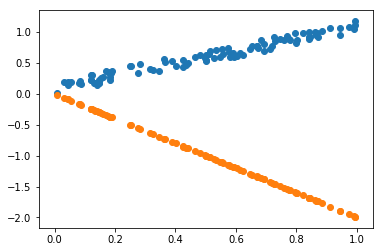

In [187]:
#prediction with random weights
y_pred = m(x)
print(y_pred.shape)
plt.scatter(x.detach().numpy(),y_true.detach().numpy())
plt.scatter(x.detach().numpy(),y_pred.detach().numpy())

In [193]:
#training
from tqdm import trange
nb_epoch = 100
for i in trange(nb_epoch): train()

100%|██████████| 100/100 [00:00<00:00, 1935.81it/s]


torch.Size([100, 1])


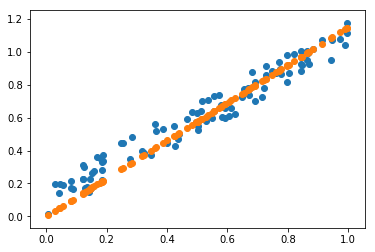

In [194]:
#prediction with learned weights
y_pred = m(x)
print(y_pred.shape)
plt.scatter(x.detach().numpy(),y_true.detach().numpy())
plt.scatter(x.detach().numpy(),y_pred.detach().numpy())

# Spiral Example

Now that you know how to create and train your own neural network, let us look at an example that showcase some of the most useful properties of a deep neural network. We will start by a classic example called **spiral classification**. The goal of this task is to correctly classify all the dots on a 2D plane according to their colors.

**Concept Assignment** Using what we learned so far can you guess the dimensions of:
1. Input tensor
2. Output tensor
3. Linear weight tensor assuming we only use a single linear layer without bias

This example is adapted from [Stanford's cs231n course](http://cs231n.github.io/neural-networks-case-study/).

### Create Spiral

In [195]:
#code from https://github.com/Datatouille/pytorch-Deep-Learning-Minicourse
def plot_shallow_model(X, y, model, e=.0):
    """
    Plot the model from torch weights.
    """
    
    X = X.numpy()
    y = y.numpy()
    w1 = torch.transpose(model[0].weight.data, 0, 1).numpy()
    b1 = model[0].bias.data.numpy()
    
    h = 0.01

    x_min, x_max = (-1.1, 1.1)
    y_min, y_max = (-1.1, 1.1)
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], w1) + b1)
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    fig = plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    plt.axis((-1.1, 1.1, -1.1, 1.1))
    plt.axis('square')

def plot_deep_model(X, y, model, e=.0):
    """
    Plot the model from torch weights.
    """
    
    X = X.numpy()
    y = y.numpy()
    w1 = torch.transpose(model.fc1.weight.data, 0, 1).numpy()
    b1 = model.fc1.bias.data.numpy()
    w2 = torch.transpose(model.fc2.weight.data, 0, 1).numpy()
    b2 = model.fc2.bias.data.numpy()
    
    h = 0.01

    x_min, x_max = (-1.1, 1.1)
    y_min, y_max = (-1.1, 1.1)
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], w1) + b1), w2) + b2
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    fig = plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    plt.axis((-1.1, 1.1, -1.1, 1.1))
    plt.axis('square')    

#code from http://cs231n.github.io/neural-networks-case-study/
def spiral_gen(N,D,K):
    #N = 100 # number of points per class
    #D = 2 # dimensionality
    #K = 3 # number of classes
    X = np.zeros((N*K,D)) # data matrix (each row = single example)
    y = np.zeros(N*K, dtype='uint8') # class labels
    for j in range(K):
      ix = range(N*j,N*(j+1))
      r = np.linspace(0.0,1,N) # radius
      t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
      X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
      y[ix] = j
    # lets visualize the data:
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    plt.show()
    return(X,y)

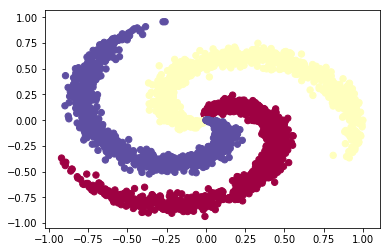

Shape of x: torch.Size([3000, 2])
Shape of y_true: torch.Size([3000])


In [196]:
#generate spiral example
D = 2 #2 features
C = 3 #3 classes
N = 3000 #number of samples

x,y_true = spiral_gen(int(N/C),D,C)
x = torch.from_numpy(x).float()
y_true = torch.from_numpy(y_true).long()
print('Shape of x:',x.shape)
print('Shape of y_true:',y_true.shape)

## Softmax Regression

Softmax regression can be thought of as simply a neural network with two layers:
1. Linear layer with dimensions `input_size x output_size`
2. Log-softmax activation layer with NLL loss or no activation with cross-entropy loss

**Coding Assignment** Implement logistic regression in a neural network perspective using what we learned so far.

In [199]:
'''
Write your code here
'''

In [200]:
#training
nb_epoch = 1000
for i in range(nb_epoch): train()

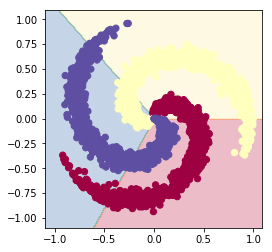

In [201]:
#evaluation
plot_shallow_model(x, y_true, m)

## Softmax Regression with Non-linear Feature Extractors

Let us try adding a few non-linearity layers before the logistic regression. We call the layers between input and output **hidden layers**.

Try some architectures like:
1. Linear layer with dimensions `input_size` x `hidden_size`
2. Some activation
3. Linear layer with dimensions `hidden_size` x `output_size`
4. Log-softmax activation layer with NLL loss or no activation with cross-entropy loss

In [220]:
'''
Write your code here
'''



In [221]:
#training
nb_epoch = 100
for i in range(nb_epoch): train()

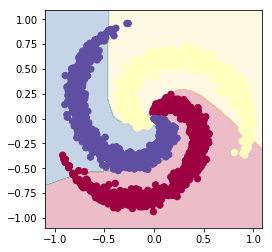

In [222]:
plot_deep_model(x, y_true, m)